In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')

from datetime import datetime
import os

In [99]:
xlsx_files = []
for file in os.listdir('data/'):    
    if not os.path.isdir("results/"):
        os.mkdir("results/")
    if not os.path.isdir(f"results/{file.split('.')[0]}/"):
        os.mkdir(f"results/{file.split('.')[0]}/")
    xlsx_files.append({'data': pd.read_excel(f'data/{file}'), 'file_name': file.split('.')[0]})                      

In [88]:
xlsx_files

[{'data':       id_i            fecha_im  id_p  apparent_power_im  ac_current_im  \
  0     4799 2022-11-10 00:00:00   218                NaN            NaN   
  1     4804 2022-11-10 00:00:00   218                NaN            NaN   
  2     4801 2022-11-10 00:00:00   218                NaN            NaN   
  3     4803 2022-11-10 00:00:00   218                NaN            NaN   
  4     4799 2022-11-10 00:05:00   218                NaN            NaN   
  ...    ...                 ...   ...                ...            ...   
  1402  4801 2022-11-10 22:55:00   218                NaN            NaN   
  1403  4803 2022-11-10 22:55:00   218                NaN            NaN   
  1404  4799 2022-11-10 23:00:00   218                NaN            NaN   
  1405  4804 2022-11-10 23:00:00   218                NaN            NaN   
  1406  4801 2022-11-10 23:00:00   218                NaN            NaN   
  
        ac_voltage_phase1_im  ac_voltage_phase2_im  ac_voltage_phase3_im  \
 

In [89]:
xlsx_files[0]['data'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407 entries, 0 to 1406
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   id_i                               1407 non-null   int64         
 1   fecha_im                           1407 non-null   datetime64[ns]
 2   id_p                               1407 non-null   int64         
 3   apparent_power_im                  0 non-null      float64       
 4   ac_current_im                      0 non-null      float64       
 5   ac_voltage_phase1_im               707 non-null    float64       
 6   ac_voltage_phase2_im               707 non-null    float64       
 7   ac_voltage_phase3_im               707 non-null    float64       
 8   dc_current_im                      1153 non-null   float64       
 9   dc_power_im                        0 non-null      float64       
 10  dc_voltage_im                      1

In [90]:
xlsx_files[1]['data'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   id_i                               576 non-null    int64         
 1   fecha_im                           576 non-null    datetime64[ns]
 2   id_p                               576 non-null    int64         
 3   apparent_power_im                  0 non-null      float64       
 4   ac_current_im                      0 non-null      float64       
 5   ac_voltage_phase1_im               332 non-null    float64       
 6   ac_voltage_phase2_im               332 non-null    float64       
 7   ac_voltage_phase3_im               332 non-null    float64       
 8   dc_current_im                      513 non-null    float64       
 9   dc_power_im                        0 non-null      float64       
 10  dc_voltage_im                      513

In [91]:
xlsx_files[0]['data']['id_i'].unique(), xlsx_files[1]['data']['id_i'].unique()

(array([4799, 4804, 4801, 4803, 4802, 4800, 4798], dtype=int64),
 array([184, 183], dtype=int64))

In [115]:
energy = xlsx_files[1]['data'][['fecha_im', 'id_i', 'active_energy_im']]
print(energy['active_energy_im'].isna().sum())
energy = energy[energy['active_energy_im'].notnull()]
power = xlsx_files[1]['data'][['fecha_im', 'id_i', 'active_power_im']]
print(power['active_power_im'].isna().sum())
power = power[power['active_power_im'].notnull()]

0
244


In [116]:
energy

,fecha_im,id_i,active_energy_im
0,2022-11-10 00:00:00,184,100358904
1,2022-11-10 00:00:00,183,112809400
2,2022-11-10 00:05:00,184,100358904
3,2022-11-10 00:05:00,183,112809400
4,2022-11-10 00:10:00,184,100358904
...,...,...,...
571,2022-11-10 23:45:00,183,112923304
572,2022-11-10 23:50:00,184,100456504
573,2022-11-10 23:50:00,183,112923304
574,2022-11-10 23:55:00,184,100456504


In [129]:
power[power['active_power_im'].apply(pd.to_numeric, errors='coerce').notna() == False].shape[0]

3

In [136]:
power = power[power['active_power_im'].apply(pd.to_numeric, errors='coerce').notna()]

In [137]:
power['active_power_im'].sum()

2520597

In [109]:
energy['active_energy_im'].min(), energy['active_energy_im'].max()

(100358904, 112923304)

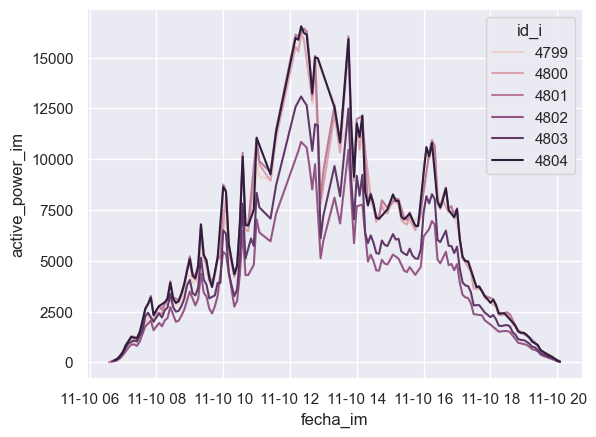

In [100]:
sns.lineplot(x="fecha_im", y="active_power_im", hue='id_i', data=power)
graph_path = f"results/{xlsx_files[0]['file_name']}/{file}_active_power.png"
plt.savefig(graph_path)

In [97]:
with open(f"results/{xlsx_files[0]['file_name']}/{xlsx_files[0]['file_name']}.txt", 'w') as output_txt:
    output_txt.write(f"Today's active power sum: {power['active_power_im'].sum()}\nToday's active energy min: {energy['active_energy_im'].min()}\nToday's active energy max: {energy['active_energy_im'].max()}\ngraph path: {os.getcwd()}\\{graph_path}")

In [12]:
data.groupby('source').mean(numeric_only=True)

,value
source,
inversor_1,4.896
inversor_2,5.214


In [13]:
data['value'].min(), data['value'].max() 

(0, 10)

In [17]:
with open(f"solar_generation_{data['date'][0].strftime('%d-%m-%Y')}.txt", 'w') as output_txt:
    output_txt.write(f"max: {data['value'].max()}\nmin: {data['value'].min()}\nsum: {data['value'].sum()}\ngraph path: {os.getcwd()}\\graph.png")

In [15]:
data['date'][0]

Timestamp('2022-01-01 04:50:25')

In [16]:
str_date = data['date'][0].strftime('%d-%m-%Y')
str_date

'01-01-2022'

In [74]:
os.getcwd()

'C:\\Users\\alfre\\Documents\\Python\\ML\\sunai'